In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score

In [2]:
credit=pd.read_csv("creditcard.csv")

In [3]:
credit.shape

(5974, 31)

In [4]:
credit.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [5]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,...,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000
mean,2677.615501,-0.266159,0.285505,0.844231,0.104200,0.000709,0.194948,0.018324,-0.039006,0.396916,...,-0.043098,-0.161548,-0.036483,0.028960,0.089873,-0.040197,0.025234,0.006116,65.061811,0.000502
std,1765.025532,1.395405,1.208867,1.031448,1.442339,1.185900,1.365525,1.059870,1.304005,1.047749,...,0.883330,0.646380,0.373210,0.619810,0.407680,0.488284,0.364482,0.265131,192.490314,0.022407
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-12.968670,-23.632502,-3.336805,...,-11.468435,-8.454599,-7.996811,-2.512377,-2.322906,-1.338556,-7.976100,-2.909294,0.000000,0.000000
25%,1162.250000,-1.015749,-0.280054,0.295701,-0.839417,-0.609206,-0.677720,-0.492968,-0.189736,-0.264280,...,-0.260507,-0.594625,-0.187108,-0.350226,-0.152744,-0.399334,-0.049681,-0.017776,4.450000,0.000000
50%,2537.000000,-0.420703,0.346083,0.882882,0.161767,-0.083983,-0.142606,0.041761,0.037831,0.360826,...,-0.111701,-0.177197,-0.046772,0.094946,0.106290,-0.079583,0.015976,0.019417,15.620000,0.000000
75%,3781.750000,1.115402,0.941548,1.504158,1.071412,0.441406,0.605784,0.566306,0.343067,0.961662,...,0.059809,0.273148,0.088154,0.435670,0.355157,0.245560,0.155281,0.082701,56.660000,0.000000
max,6645.000000,1.685314,7.467017,4.101716,6.013346,10.658654,21.393069,34.303177,3.877662,9.272376,...,22.580675,4.393846,4.095021,3.200201,1.972515,3.463246,3.852046,4.860769,7712.430000,1.000000


In [6]:
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [8]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5974 non-null   int64  
 1   V1      5974 non-null   float64
 2   V2      5974 non-null   float64
 3   V3      5974 non-null   float64
 4   V4      5974 non-null   float64
 5   V5      5974 non-null   float64
 6   V6      5974 non-null   float64
 7   V7      5974 non-null   float64
 8   V8      5974 non-null   float64
 9   V9      5974 non-null   float64
 10  V10     5974 non-null   float64
 11  V11     5974 non-null   float64
 12  V12     5974 non-null   float64
 13  V13     5974 non-null   float64
 14  V14     5974 non-null   float64
 15  V15     5974 non-null   float64
 16  V16     5974 non-null   float64
 17  V17     5974 non-null   float64
 18  V18     5973 non-null   float64
 19  V19     5973 non-null   float64
 20  V20     5973 non-null   float64
 21  V21     5973 non-null   float64
 22  

In [7]:
credit['Class'].value_counts()

Class
0.0    5970
1.0       3
Name: count, dtype: int64

In [9]:
normal=credit[credit.Class==0]
fraud=credit[credit.Class==1]
print(normal.shape)

(5970, 31)


In [10]:
normal.Amount.describe()

count    5970.000000
mean       64.965707
std       192.429839
min         0.000000
25%         4.450000
50%        15.620000
75%        56.485000
max      7712.430000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count      3.000000
mean     256.310000
std      264.880121
min        0.000000
25%      119.965000
50%      239.930000
75%      384.465000
max      529.000000
Name: Amount, dtype: float64

In [12]:
credit.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,2677.40201,-0.264965,0.285625,0.844580,0.102656,0.000958,0.195420,0.018542,-0.039195,0.397472,...,0.055426,-0.043268,-0.161540,-0.036683,0.028985,0.089890,-0.040132,0.025238,0.006163,64.965707
1.0,1780.00000,-2.553039,0.184644,-0.293711,2.872264,0.005330,-0.855718,-0.549831,0.308239,-1.093098,...,0.599742,0.294921,-0.177321,0.361160,-0.020311,0.056068,-0.170050,0.015979,-0.086847,256.310000


In [13]:
credit.groupby("Class").median()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,2537.0,-0.420160,0.346083,0.882882,0.160580,-0.083455,-0.142606,0.041590,0.037831,0.360892,...,0.004441,-0.111801,-0.177211,-0.046782,0.095253,0.106364,-0.079417,0.015959,0.019421,15.62
1.0,472.0,-2.312227,1.759247,-0.359745,2.330243,-0.522188,-1.064823,0.325574,-0.067794,-0.270953,...,0.126911,0.517232,-0.035049,0.172726,-0.087330,0.044519,-0.145362,0.039566,-0.143276,239.93


In [14]:
normal_sample=normal.sample(n=492)
new_credit=pd.concat([normal_sample,fraud],axis=0)
new_credit.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2673,2213,-0.242858,0.668693,1.679167,1.098383,0.470291,0.001612,0.889940,-0.332754,0.249789,...,-0.078690,0.253596,-0.172603,0.057435,-0.394462,-0.383128,-0.275170,-0.282527,1.00,0.0
5521,5587,1.259444,0.475105,0.448349,0.894772,-0.283975,-1.020199,0.002428,-0.291024,1.299332,...,-0.436940,-1.007261,0.138824,0.282136,0.197747,0.055719,-0.049052,0.024651,1.98,0.0
5166,4910,-0.502119,0.756415,2.687770,1.469198,-0.561451,0.000752,0.236502,0.057790,1.813353,...,-0.428174,-0.554130,0.054045,0.863721,-0.353226,-0.705779,0.180479,0.161001,18.98,0.0
2443,2011,0.739307,-0.853921,-1.751050,0.303892,2.056073,3.473621,0.115686,0.683156,-0.046003,...,0.088045,-0.390217,-0.440697,1.035291,0.898443,-0.292250,-0.041889,0.057338,293.44,0.0
486,356,1.586093,-1.169091,-1.350477,-2.504580,1.106389,3.135282,-1.351529,0.690932,-2.090697,...,-0.200366,-0.325402,-0.071104,0.996898,0.681093,-0.100190,0.022118,0.009259,15.00,0.0
2382,1934,-0.221076,0.622814,2.008656,0.695715,-0.269349,-0.576362,0.616767,-0.239736,0.145053,...,-0.010826,0.368450,-0.195933,0.763727,-0.288461,0.414197,-0.042734,-0.085078,3.79,0.0
3834,3370,1.104182,-0.187624,1.027518,1.058222,-0.558695,0.677636,-0.794111,0.293139,0.722570,...,0.243596,0.714094,-0.171981,-0.749436,0.384448,-0.159804,0.083073,0.037842,44.50,0.0
3872,3420,-0.884357,1.406706,-0.073748,-0.362845,0.588628,0.339749,0.305983,-0.390718,-0.518583,...,0.816300,-0.248264,-0.103871,-1.327739,-0.204900,0.368959,-0.109724,0.065242,23.00,0.0
5335,5250,1.125732,0.580033,0.762026,2.442682,0.211094,0.482414,-0.197910,0.160584,0.397897,...,-0.349087,-0.865218,0.141430,-0.431879,0.146214,-0.270187,-0.025082,0.004080,2.71,0.0
306,221,-0.342871,-0.199546,1.976353,-0.003495,-1.170366,0.883501,-0.151879,0.160106,0.137973,...,-0.313443,0.086207,0.109600,-0.098951,-0.943009,-0.618657,0.253306,0.240271,99.82,0.0


In [15]:
new_credit['Class'].value_counts()

Class
0.0    492
1.0      3
Name: count, dtype: int64

In [16]:
new_credit.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,2623.691057,-0.240016,0.278169,0.897315,0.035404,0.010775,0.260361,0.026125,0.022100,0.401560,...,0.032691,-0.037805,-0.171708,-0.031397,0.061164,0.070649,-0.059819,0.023056,0.016946,59.316362
1.0,1780.000000,-2.553039,0.184644,-0.293711,2.872264,0.005330,-0.855718,-0.549831,0.308239,-1.093098,...,0.599742,0.294921,-0.177321,0.361160,-0.020311,0.056068,-0.170050,0.015979,-0.086847,256.310000


In [25]:
new_credit.dropna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2673,2213,-0.242858,0.668693,1.679167,1.098383,0.470291,0.001612,0.889940,-0.332754,0.249789,...,-0.078690,0.253596,-0.172603,0.057435,-0.394462,-0.383128,-0.275170,-0.282527,1.00,0.0
5521,5587,1.259444,0.475105,0.448349,0.894772,-0.283975,-1.020199,0.002428,-0.291024,1.299332,...,-0.436940,-1.007261,0.138824,0.282136,0.197747,0.055719,-0.049052,0.024651,1.98,0.0
5166,4910,-0.502119,0.756415,2.687770,1.469198,-0.561451,0.000752,0.236502,0.057790,1.813353,...,-0.428174,-0.554130,0.054045,0.863721,-0.353226,-0.705779,0.180479,0.161001,18.98,0.0
2443,2011,0.739307,-0.853921,-1.751050,0.303892,2.056073,3.473621,0.115686,0.683156,-0.046003,...,0.088045,-0.390217,-0.440697,1.035291,0.898443,-0.292250,-0.041889,0.057338,293.44,0.0
486,356,1.586093,-1.169091,-1.350477,-2.504580,1.106389,3.135282,-1.351529,0.690932,-2.090697,...,-0.200366,-0.325402,-0.071104,0.996898,0.681093,-0.100190,0.022118,0.009259,15.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,1639,0.711008,-1.115349,0.984987,0.300832,-1.264504,0.365257,-0.559910,0.278195,0.917004,...,-0.016760,-0.264827,-0.058754,0.319226,-0.072651,0.919997,-0.060490,0.038756,215.58,0.0
3631,3105,-0.521762,0.626184,-0.599239,-3.271827,2.656585,2.747355,0.584885,0.567661,0.887218,...,-0.021664,0.228997,-0.319731,1.005759,0.285072,-0.819992,0.346156,0.039702,1.00,0.0
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0


In [28]:
credit.dropna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,6633,1.197756,0.553352,0.866976,1.432084,-0.454121,-1.127419,0.115799,-0.375933,1.110818,...,-0.154257,-0.111427,0.041743,0.872993,0.490391,-0.514364,0.004637,0.027420,5.00,0.0
5969,6634,-1.611463,0.190648,0.901715,1.531254,-1.535865,0.799245,1.513786,0.495829,0.200390,...,0.211223,0.007477,1.026272,0.057628,-0.024955,-0.368263,0.081684,0.140669,458.92,0.0
5970,6635,-1.420272,1.449354,1.320110,-1.894320,0.913695,0.454601,0.894179,-0.385450,2.433841,...,-0.529027,-0.368394,-0.247773,-1.189156,-0.126040,0.701487,0.277333,-0.222694,0.77,0.0
5971,6637,-1.206696,0.284728,2.152053,-2.850437,-0.437285,-0.238376,-0.333341,0.334679,2.870542,...,0.039460,0.464476,-0.457193,-0.556105,0.517579,0.008006,0.366054,0.185008,14.00,0.0


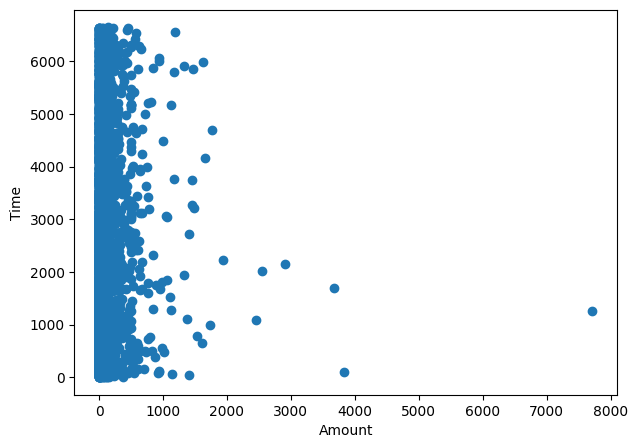

In [26]:
fig,ax=plt.subplots(figsize=(7,5))
ax.scatter(credit['Amount'],credit['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

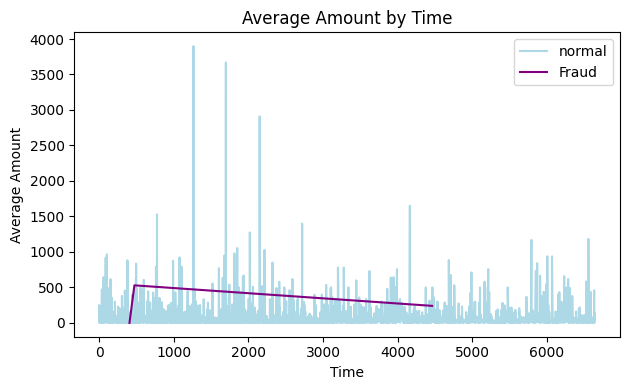

In [29]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(credit[credit['Class'] == 0].groupby('Time')['Amount'].mean(), label='normal', color='lightblue')
plt.plot(credit[credit['Class'] == 1].groupby('Time')['Amount'].mean(), label='Fraud', color='purple')
plt.xlabel('Time')
plt.ylabel('Average Amount')
plt.legend()
plt.title('Average Amount by Time')
plt.tight_layout()
plt.show()

In [30]:
credit.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [34]:
X=new_credit.drop(columns='Class',axis=1)
Y=new_credit['Class']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
model=LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
X_train_prediction=model.predict(X_train)
training_data_acuracy=accuracy_score(X_train_prediction,Y_train)*100
print(f"Training Data Accuracy: {training_data_acuracy}%")

Training Data Accuracy: 100.0%
